In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
udemy_courses = pd.read_csv('Moocs/udemy_courses.csv')

In [37]:
udemy_courses.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

La meta general sera ganar mas, y este dataset nos lo permite

In [38]:
udemy_courses.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [39]:
udemy_courses['is_paid'].unique()

array([ True, False])

In [40]:
udemy_courses['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [41]:
udemy_courses['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [42]:
udemy_courses['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3673    2016-06-14T17:36:46Z
3674    2017-03-10T22:24:30Z
3675    2015-12-30T16:41:42Z
3676    2016-08-11T19:06:15Z
3677    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3678, dtype: object

In [43]:
udemy_courses.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

- Ingresos Anuales de Udemy

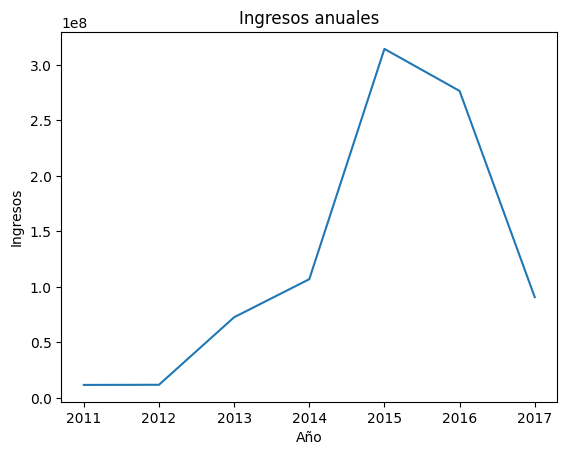

In [44]:
# Extraer el año de la columna 'timestamp'
udemy_courses['year'] = pd.to_datetime(udemy_courses['published_timestamp']).dt.year

# Calcular el producto punto y almacenarlo en una nueva columna 'revenue'
udemy_courses['revenue'] = udemy_courses['price'] * udemy_courses['num_subscribers']

# Agrupar por año y sumar los valores de 'revenue' para cada año
revenue_by_year = udemy_courses.groupby('year')['revenue'].sum()

# Graficar el gráfico de líneas de tiempo
plt.plot(revenue_by_year.index, revenue_by_year.values)
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.title('Ingresos anuales')
plt.show()

# Primeras impresiones + Hipotesis
- Bueno, parece ser que algo estan haciendo mal los de Udemy. La tendencia de los ingresos de las suscripciones parece ser muy mala en estos ultimos dos años del dataset, sin embargo, hay que resaltar tambien que durante los años 2012 y 2015 han hecho las cosas bien para subir como la espuma los ingresos de las suscripciones.
- Como primera hipotesis o suposicion se me ocurre que durante estos años, Udemy ha participado y aprovechado (al mismo tiempo) del auge del internet **[HABRA QUE BUSCAR DATOS QUE PUEDAN AFIRMAR O RECHAZAR ESTA HIPOTESIS]**.
- Debo agregar tambien de que otra hipotesis que se me ocurre es que los cursos que mayores ingresos de suscripciones han generado durante estos años dorados de Udemy han sido los cursos que estan relacionados con la informatica **[HABRA QUE ANALIZAR LOS DATOS PARA AFIRMAR O RECHAZAR ESTA HIPOTESIS]**.



- Cantidad de cursos estrenados en Udemy en cada año

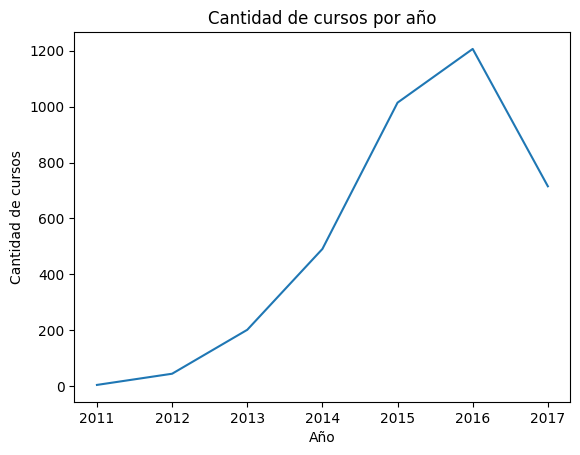

In [45]:
# Agrupar por año y contar la cantidad de filas en cada grupo
year_counts = udemy_courses.groupby('year').size()

# Graficar el gráfico de líneas de tiempo
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de cursos')
plt.title('Cantidad de cursos por año')
plt.show()

- Al parecer existe una correlacion alta entre la cantidad de cursos y los ingresos.

# Hipotesis 2:
  - Los cursos que mas ingresos han generado son los cursos relacionados con la informatica

a) En cada año, ¿que porcentaje representa cada area de estudio (respecto a la cantidad de cursos publicados)?

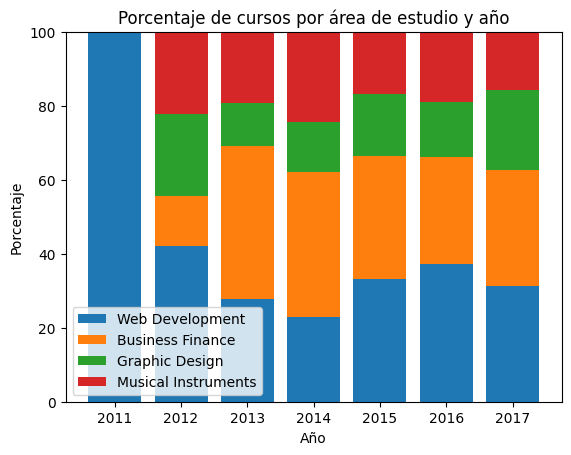

In [46]:
# Agrupar por año y área de estudio única
grouped_data = udemy_courses.groupby(['year', 'subject'])

# Calcular la cantidad de cursos totales por año
total_counts = grouped_data.size().groupby(level=0).sum()

# Calcular el porcentaje de cada área de estudio en cada año
diversity_percentages = grouped_data.size().div(total_counts, level='year') * 100

# Obtener las áreas únicas
unique_subjects = diversity_percentages.index.get_level_values('subject').unique()

# Configurar el gráfico de barras apiladas
fig, ax = plt.subplots()

# Iterar sobre las áreas únicas y agregar barras apiladas
bottom = None
for i, area in enumerate(unique_subjects):
    area_data = diversity_percentages.unstack().loc[:, area]
    bars = ax.bar(area_data.index, area_data.values, bottom=bottom, label=area)

    if bottom is None:
        bottom = area_data.values
    else:
        bottom += area_data.values

# Configurar las etiquetas y el título del gráfico
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de cursos por área de estudio y año')

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico de barras apiladas
plt.show()

b) En cada año, ¿que porcentaje representa cada area de estudio (respecto a los ingresos generados)?

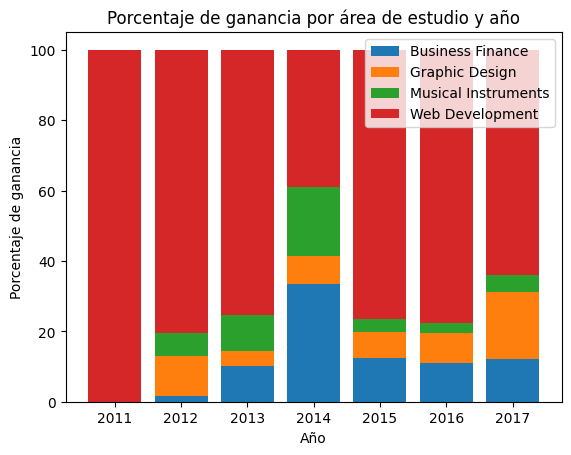

In [47]:
# Filtrar solo aquellos cursos de pago
udemy_courses_pago = udemy_courses[udemy_courses['is_paid']==True]

# Agrupar por área de estudio y año
grouped_data = udemy_courses_pago.groupby(['subject', 'year'])

# Calcular la suma de ganancias por cada grupo
revenue_sums = grouped_data['revenue'].sum().reset_index()

# Obtener las áreas únicas y los años únicos
unique_subjects = revenue_sums['subject'].unique()
unique_years = revenue_sums['year'].unique()

# Crear un DataFrame vacío para almacenar los porcentajes de ganancia
percentage_data = pd.DataFrame(index=unique_years, columns=unique_subjects)

# Llenar el DataFrame con los porcentajes de ganancia
for year in unique_years:
    year_data = revenue_sums[revenue_sums['year'] == year]
    total_revenue = year_data['revenue'].sum()

    for subject in unique_subjects:
        if subject in year_data['subject'].values:
            revenue = year_data[year_data['subject'] == subject]['revenue'].item()
            percentage = revenue / total_revenue * 100
            percentage_data.loc[year, subject] = percentage
        else:
            percentage_data.loc[year, subject] = 0

# Ordenar los años de forma ascendente
unique_years_sorted = sorted(unique_years)

# Configurar el gráfico de barras apiladas
fig, ax = plt.subplots()

# Obtener la posición de cada año en el eje x
x = range(len(unique_years_sorted))

# Inicializar la altura acumulada de las barras
bottom = [0] * len(unique_years_sorted)

# Iterar sobre las áreas de estudio y agregar barras apiladas
for subject in unique_subjects:
    percentages = percentage_data[subject].loc[unique_years_sorted].tolist()
    bars = ax.bar(x, percentages, bottom=bottom, label=subject)
    bottom = [prev + curr for prev, curr in zip(bottom, percentages)]

# Configurar las etiquetas y el título del gráfico
plt.xlabel('Año')
plt.ylabel('Porcentaje de ganancia')
plt.title('Porcentaje de ganancia por área de estudio y año')

# Configurar las etiquetas del eje x con los años ordenados
ax.set_xticks(x)
ax.set_xticklabels(unique_years_sorted)

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico de barras apiladas
plt.show()

# Conclusiones - Hipotesis 2:
- Al parecer en todos los años a excepcion del año 2011, la cantidad de cursos del area de web development ha representado el 30% (entorno al 30%) del total de cursos publicados en cada año. Ademas su ganancia en cada año ha representado un 70% (en torno al 70%) de las ganancias totales de cada año [a excepcion del año 2014].
- Podriamos decir que con 'relativamente poco' han hecho 'relativamente mucho daño', han sido muy eficientes en estos años a pesar de la tendencia de los ultimos años (en la base datos).
- Por tanto decimos que la hipotesis planteada ha sido confirmada. Esto nos sugiere como **conclusion debil** de que ha sido buena idea realizar cursos de desarrollo web durante estos años, y, porque no, es buena idea desarrollar mas cursos de desarrollo web estos años venideros.
- Adentrandonos a lo mas profundo, y suponiendo de que la hipotesis dos representa gran porcentaje significativo de participacion en los hehos sucedidos (ha sido determinante para que Udemy haya generado estos ingresos que como vimos son muy buenos), nos sugeriria concluir como **conclusion fuerte** de que es buena opcion ver el mercado de las tendencias y apuntar a desarrollar cursos que vayan acorde a estas tendencias ---> *Algo que esta en tendencia estos dos ultimos años es el area de la Inteligencia Artificial, por tanto seria buena idea desarrollar cursos que esten catalogados como 'Cursos para aprender Inteligencia Artificial'*
- Y si quisieramos liderar las ventas o ser pioneros en 'una epoca dorada', habria que estudiar el mercado de la educacion y predecir que areas seran las de mayor aceptacion o tendencia la decada que nos viene ---> *No tengo datos que lo avalen, sin embargo, como criterio personal, el area de la robotica parecere que es una joya*

- Duracion de los cursos en cada año (distribuciones de los datos)
      - [7 HISTOGRAMAS (LOS 7 AÑOS), DURACION EN HORAS VS FRECUENCIA]

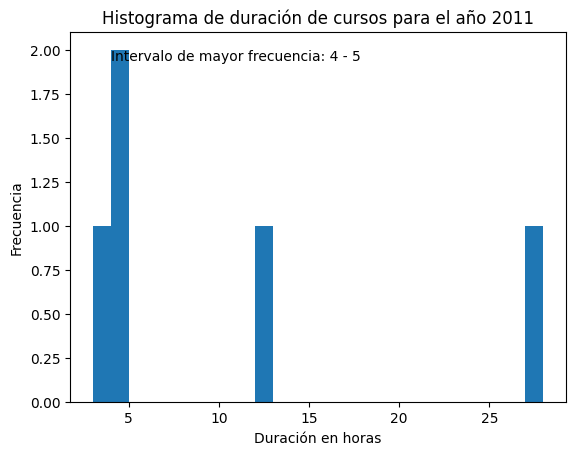

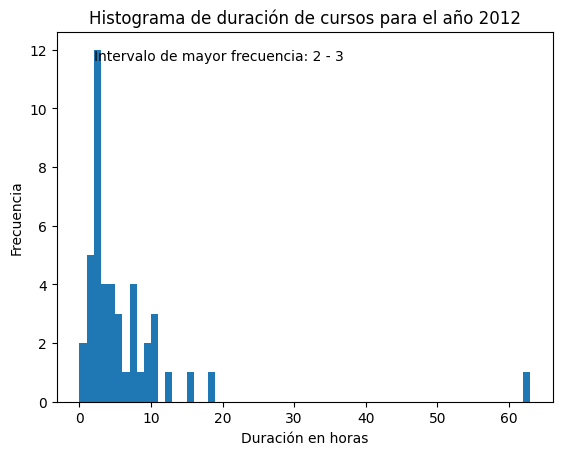

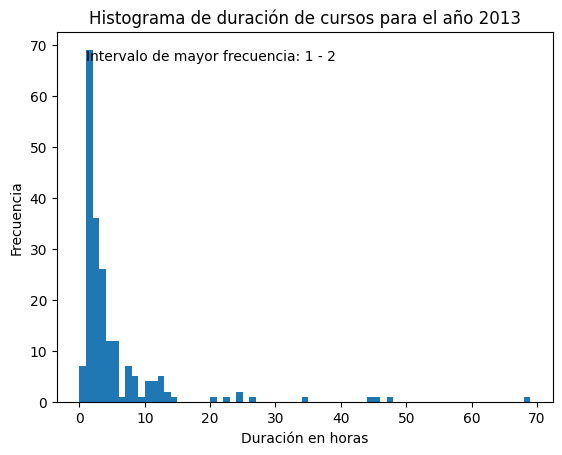

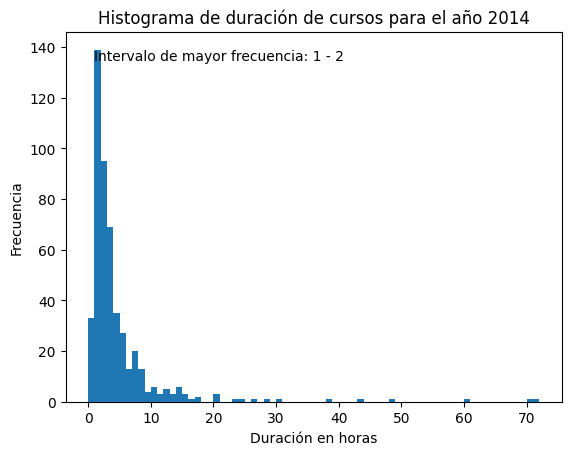

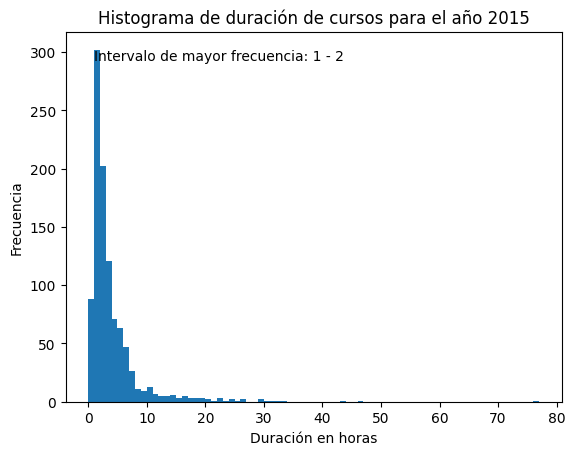

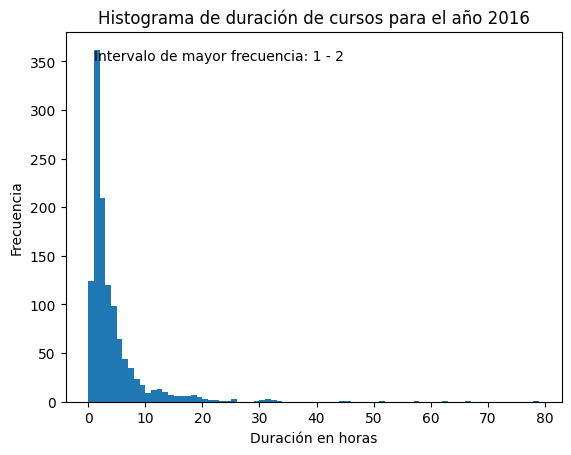

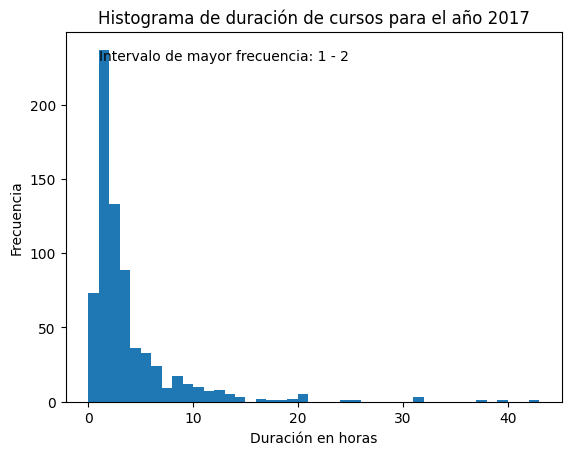

In [48]:
# Obtener los años únicos y ordenarlos
unique_years = sorted(udemy_courses['year'].unique())

# Crear un gráfico de histograma para cada año en orden ascendente
for year in unique_years:
    df_year = udemy_courses[udemy_courses['year'] == year]
    durations = df_year['content_duration']

    frequencies, bin_edges = np.histogram(durations, bins=range(int(min(durations)), int(max(durations)) + 2, 1))

    # Encontrar el índice del bin con mayor frecuencia
    max_frequency_index = np.argmax(frequencies)

    # Calcular el rango de valores correspondiente al bin con mayor frecuencia
    interval_start = bin_edges[max_frequency_index]
    interval_end = bin_edges[max_frequency_index + 1]

    # Obtener el rango del bin de mayor frecuencia como texto
    interval_text = f"{interval_start}-{interval_end}"

    # Gráfico de histograma
    plt.hist(durations, bins=range(int(min(durations)), int(max(durations)) + 2, 1))
    plt.xlabel('Duración en horas')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de duración de cursos para el año {}'.format(year))
    plt.text(interval_start, max(frequencies), 'Intervalo de mayor frecuencia: {} - {}'.format(interval_start, interval_end), verticalalignment='top', horizontalalignment='left')
    plt.show()

      - Entre 1 - 3 horas de duracion de cada curso es lo mas aceptado por la comunidad

- Duracion de los cursos del area de Web Development en cada año (distribuciones de los datos)
      - [7 HISTOGRAMAS (EL NUMERO DE AÑOS), DURACION EN HORAS VS FRECUENCIA]

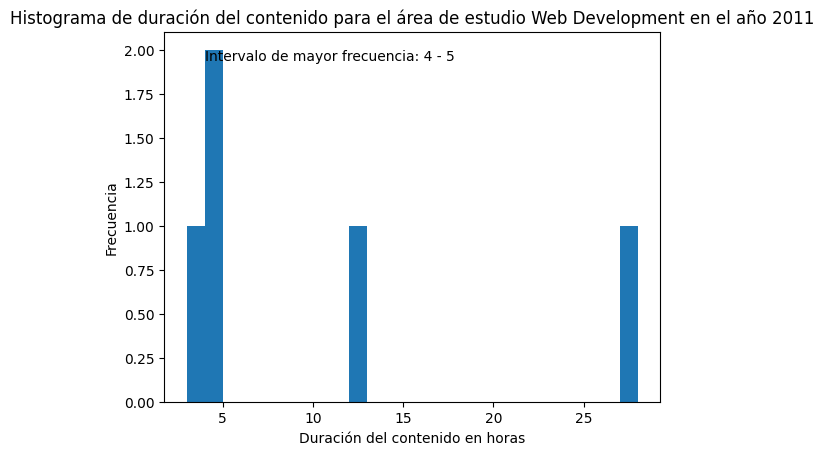

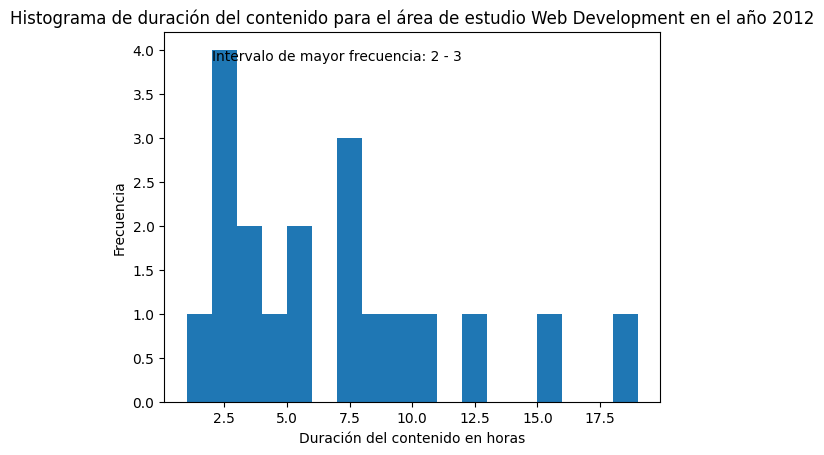

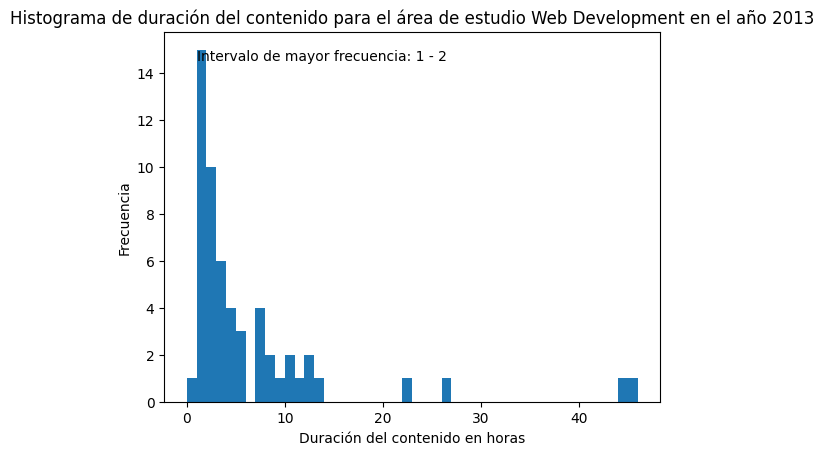

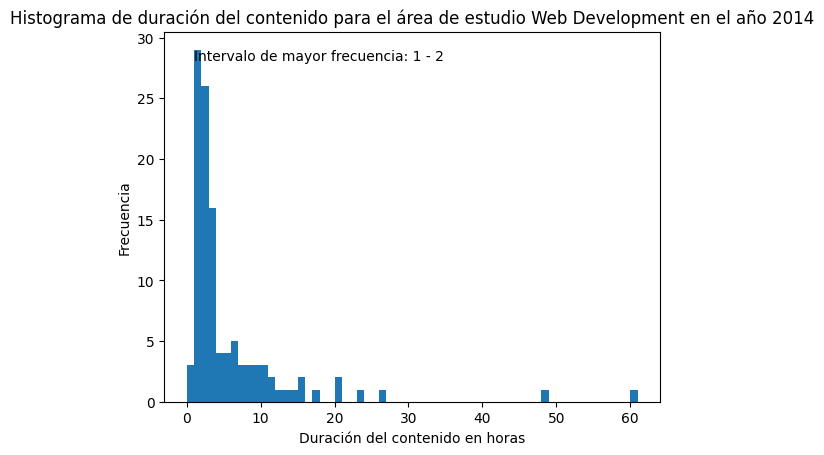

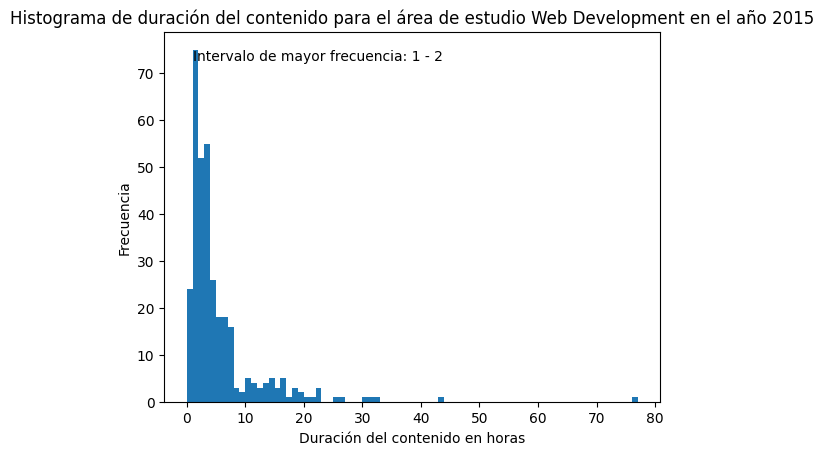

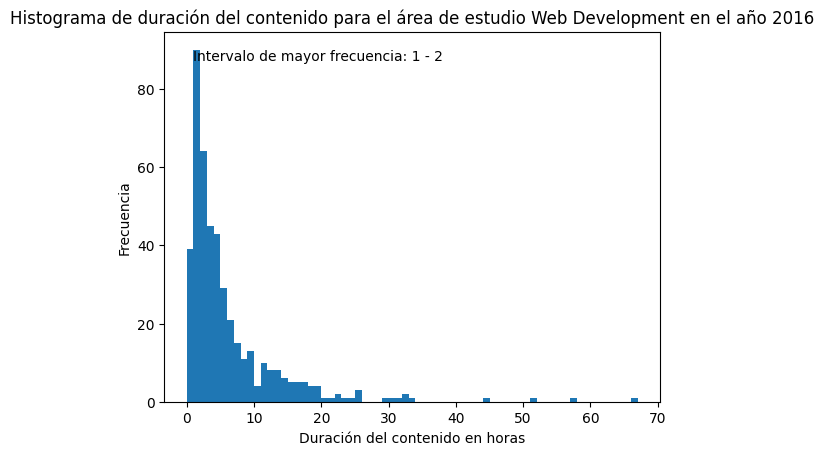

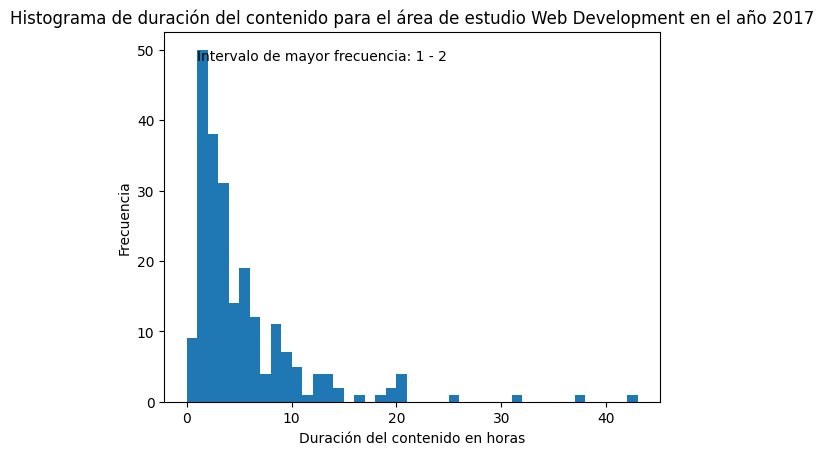

In [49]:
# Obtener los años únicos y ordenarlos
unique_years = sorted(udemy_courses['year'].unique())

# Crear un gráfico de histograma para cada año en orden ascendente
for year in unique_years:
    df_year = udemy_courses[(udemy_courses['year'] == year) & (udemy_courses['subject'] == 'Web Development')]
    durations = df_year['content_duration']

    # Calcular el histograma
    hist, bins = np.histogram(durations, bins=range(int(min(durations)), int(max(durations)) + 2, 1))

    # Encontrar el índice del intervalo con la mayor frecuencia
    indice_max_frecuencia = np.argmax(hist)

    # Obtener los límites del intervalo con mayor frecuencia
    intervalo_mayor_frecuencia = (bins[indice_max_frecuencia], bins[indice_max_frecuencia + 1])

    # Graficar el histograma
    plt.hist(durations, bins=range(int(min(durations)), int(max(durations)) + 2, 1))
    plt.xlabel('Duración del contenido en horas')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de duración del contenido para el área de estudio Web Development en el año {}'.format(year))

    # Mostrar el intervalo de mayor frecuencia
    plt.text(intervalo_mayor_frecuencia[0], max(hist), 'Intervalo de mayor frecuencia: {} - {}'.format(intervalo_mayor_frecuencia[0], intervalo_mayor_frecuencia[1]),
             verticalalignment='top', horizontalalignment='left')

    plt.show()

      - Entre 1 - 3 horas, la duracion de los cursos de Web Development es lo mas aceptado por la comunidad


- Numero de lecturas de cada año (distribuciones de los datos)
      - [7 HISTOGRAMAS (EL NUMERO DE AÑOS), NUMERO DE LECTURAS VS FRECUENCIA]

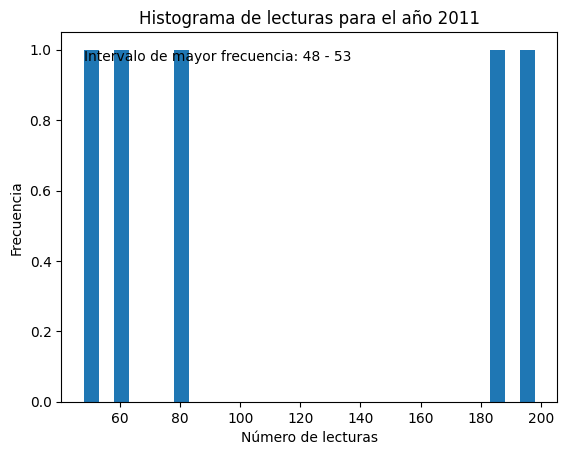

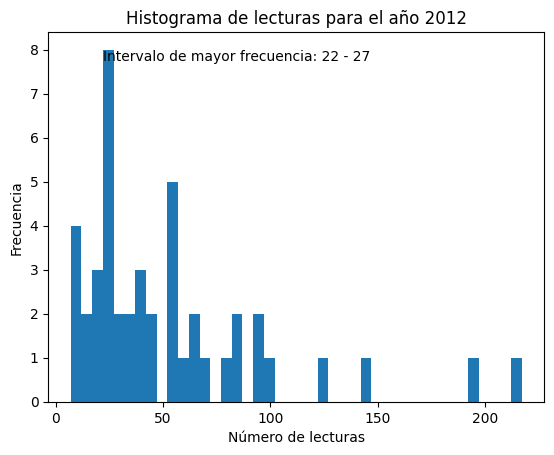

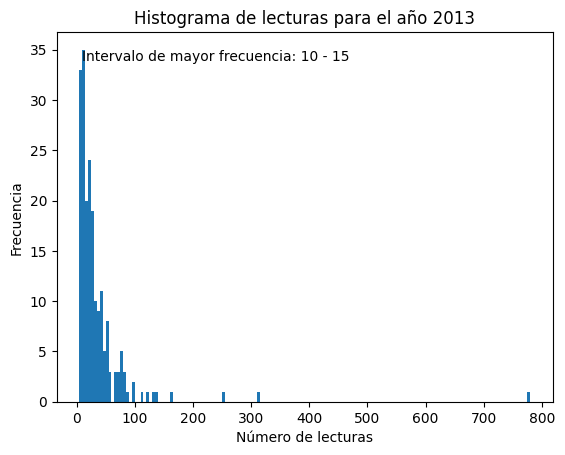

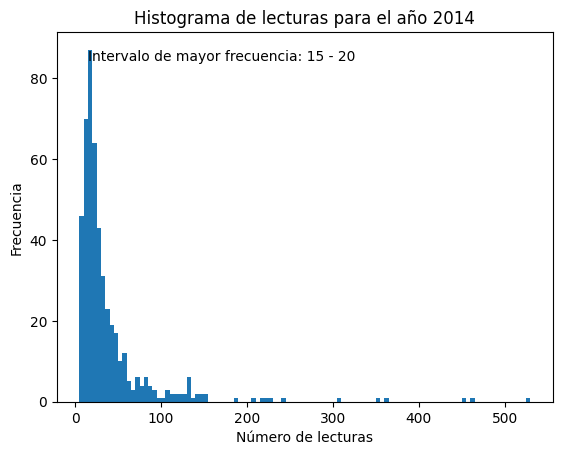

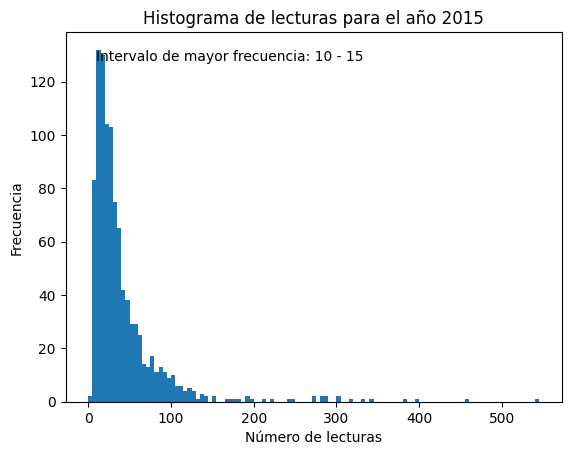

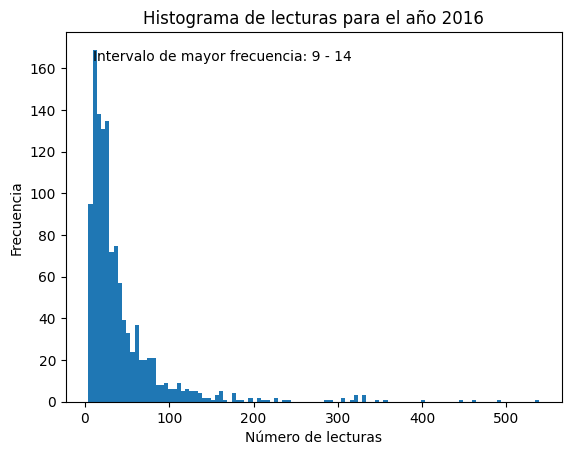

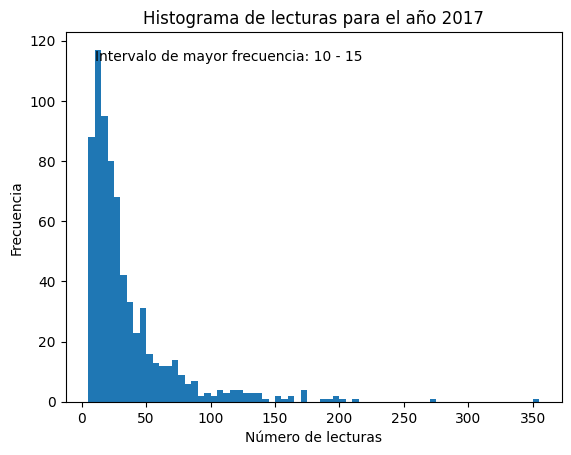

In [50]:
unique_years = sorted(udemy_courses['year'].unique())

# Crear un gráfico de histograma para cada año en orden ascendente
for year in unique_years:
    df_year = udemy_courses[udemy_courses['year'] == year]
    lecturas = df_year['num_lectures']

    frequencies, bin_edges = np.histogram(lecturas, bins=range(min(lecturas), max(lecturas) + 6, 5))

    # Encontrar el índice del bin con mayor frecuencia
    max_frequency_index = np.argmax(frequencies)

    # Calcular el rango de valores correspondiente al bin con mayor frecuencia
    interval_start = bin_edges[max_frequency_index]
    interval_end = bin_edges[max_frequency_index + 1]

    # Obtener el rango del bin de mayor frecuencia como texto
    interval_text = f"{interval_start}-{interval_end}"

    # Gráfico de histograma
    plt.hist(lecturas, bins=range(min(lecturas), max(lecturas) + 6, 5))
    plt.xlabel('Número de lecturas')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de lecturas para el año {}'.format(year))
    plt.text(interval_start, max(frequencies), 'Intervalo de mayor frecuencia: {} - {}'.format(interval_start, interval_end), verticalalignment='top', horizontalalignment='left')
    plt.show()

      - Entre 10 - 20 lecturas de cada curso es lo mas aceptado por la comunidad

- Numero de lecturas de los cursos de Web Development en cada año (distribuciones de los datos)
      - [7 HISTOGRAMAS (NUMERO DE AÑOS), NUMERO DE LECTURAS VS FRECUENCIA]

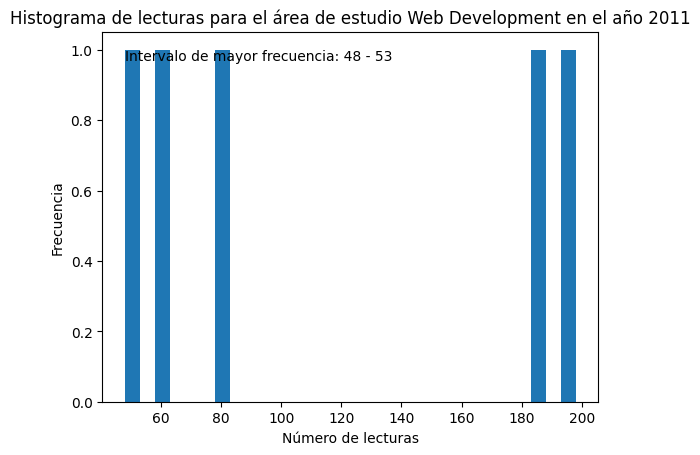

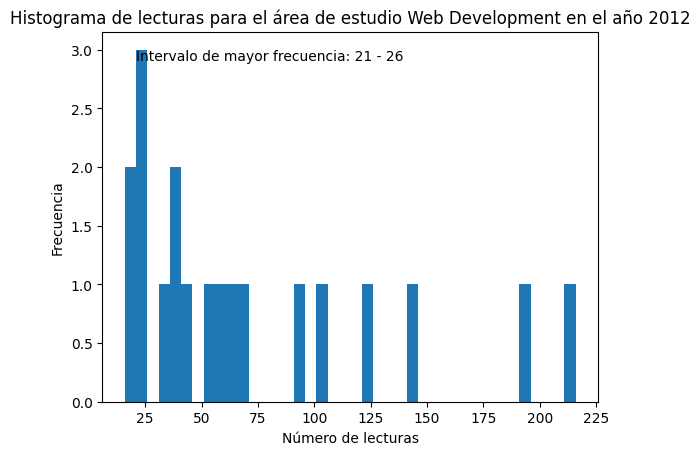

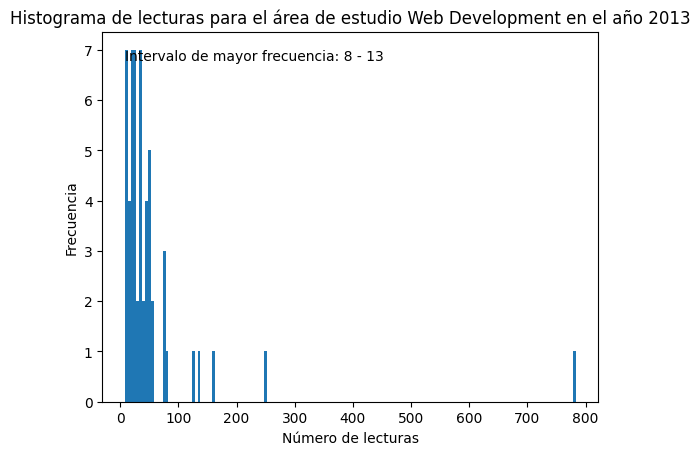

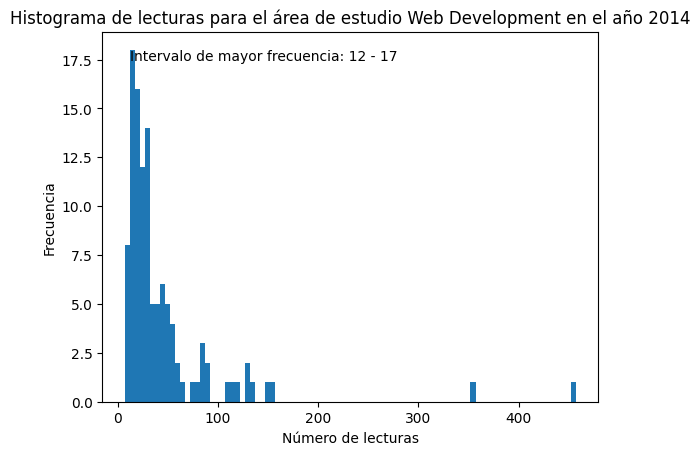

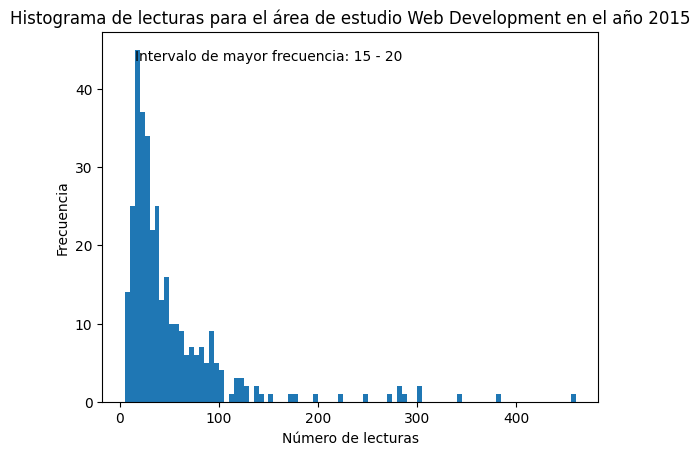

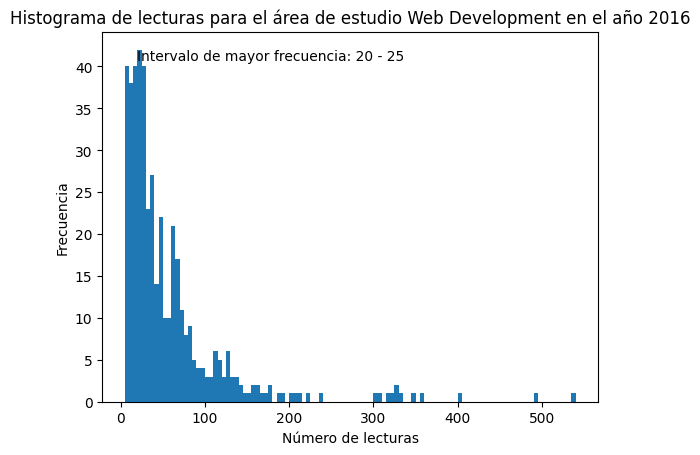

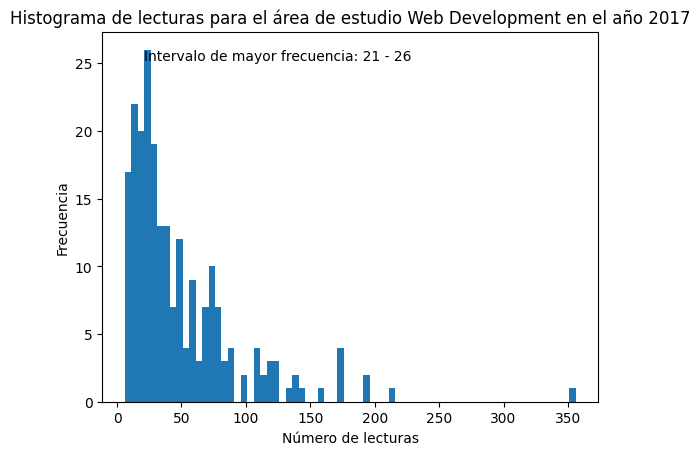

In [51]:
# Obtener los años únicos y ordenarlos
unique_years = sorted(udemy_courses['year'].unique())

# Crear un gráfico de histograma para cada año en orden ascendente
for year in unique_years:
    df_year = udemy_courses[(udemy_courses['year'] == year) & (udemy_courses['subject'] == 'Web Development')]
    lecturas = df_year['num_lectures']

    # Calcular el histograma
    hist, bins = np.histogram(lecturas, bins=range(min(lecturas), max(lecturas) + 6, 5))

    # Encontrar el índice del intervalo con la mayor frecuencia
    indice_max_frecuencia = np.argmax(hist)

    # Obtener los límites del intervalo con mayor frecuencia
    intervalo_mayor_frecuencia = (bins[indice_max_frecuencia], bins[indice_max_frecuencia + 1])

    # Graficar el histograma
    plt.hist(lecturas, bins=range(min(lecturas), max(lecturas) + 6, 5))
    plt.xlabel('Número de lecturas')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de lecturas para el área de estudio Web Development en el año {}'.format(year))

    # Mostrar el intervalo de mayor frecuencia
    plt.text(intervalo_mayor_frecuencia[0], max(hist), 'Intervalo de mayor frecuencia: {} - {}'.format(intervalo_mayor_frecuencia[0], intervalo_mayor_frecuencia[1]),
             verticalalignment='top', horizontalalignment='left')

    plt.show()

     - Entre 15 - 25 lecturas de cada curso de Web development es lo mas aceptado por la comunidad

- Duracion de las clases en cada año (distribuciones de los datos)
      - [7 HISTOGRAMAS (NUMERO DE AÑOS), DURACION DE LA CLASE EN MINUTOS VS FRECUENCIA]

In [52]:
udemy_courses['lectures_duration_in_minutes'] = udemy_courses['content_duration'] / udemy_courses['num_lectures']*60

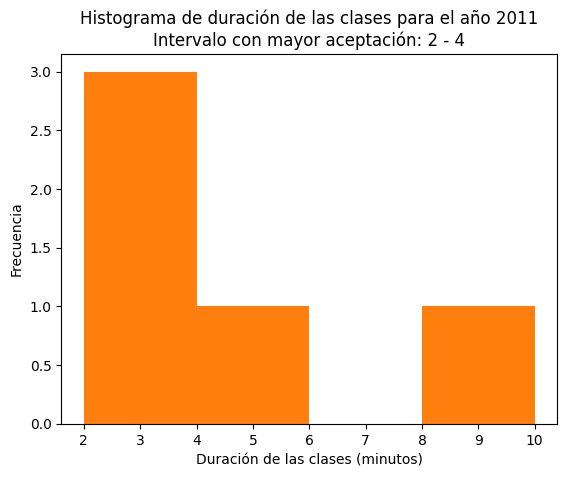

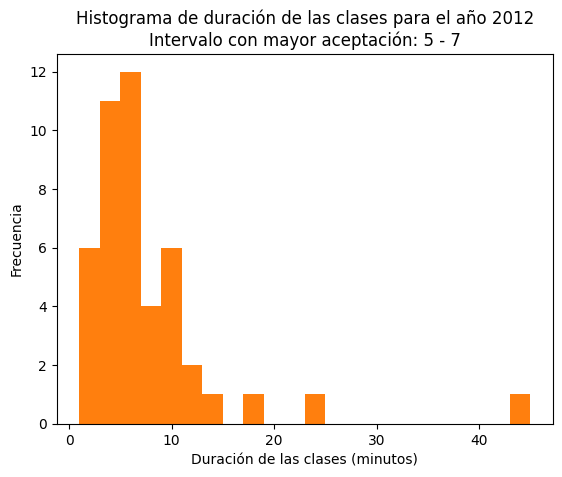

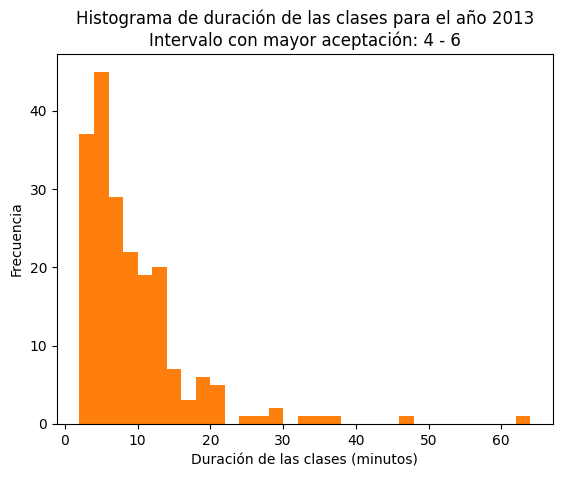

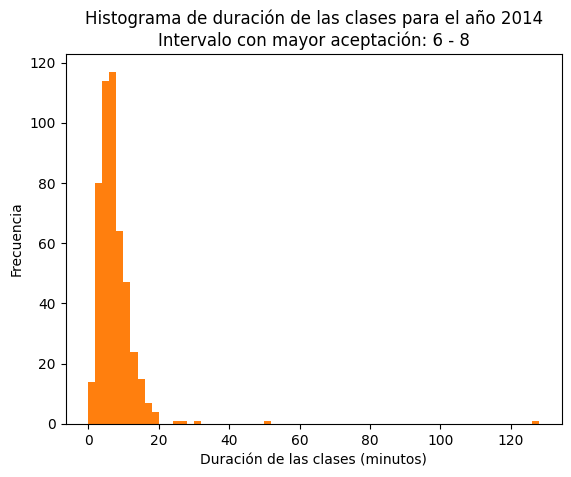

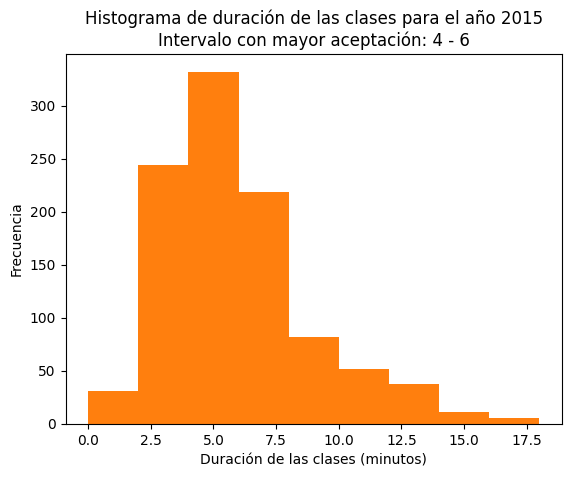

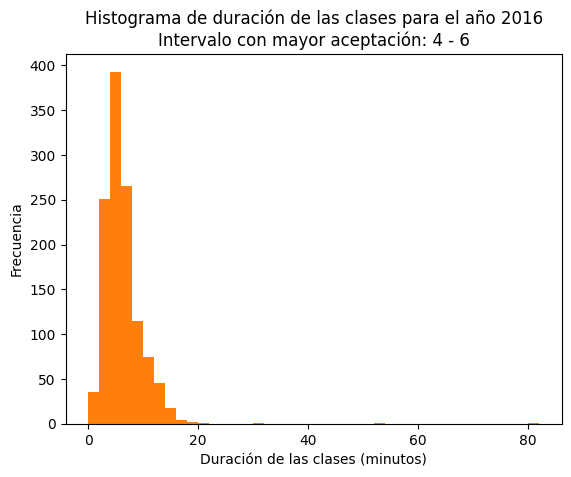

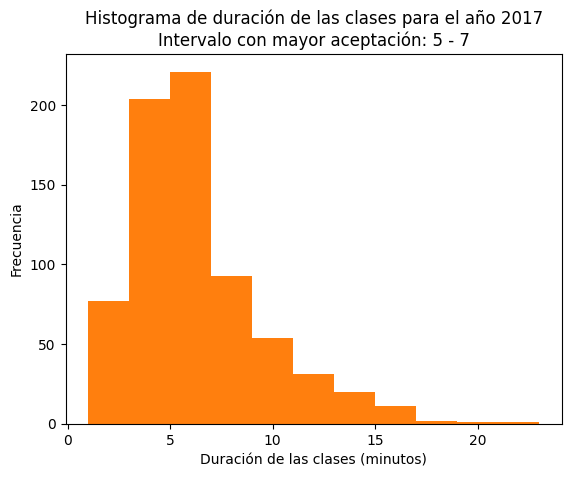

In [53]:
# Obtener los años únicos y ordenarlos
unique_years = sorted(udemy_courses['year'].unique())

# Crear un gráfico de histograma para cada año en orden ascendente
for year in unique_years:
    df_year = udemy_courses[udemy_courses['year'] == year]
    lectures_duration = df_year['lectures_duration_in_minutes']

    plt.hist(lectures_duration, bins=range(int(min(lectures_duration)), int(max(lectures_duration)) + 3, 2))
    plt.xlabel('Duración de las clases (minutos)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de duración de las clases para el año {}'.format(year))

    # Encontrar el intervalo con mayor aceptación
    interval_counts, bin_edges, _ = plt.hist(lectures_duration, bins=range(int(min(lectures_duration)), int(max(lectures_duration)) + 3, 2))
    max_acceptance_interval = np.argmax(interval_counts)
    max_interval_start = bin_edges[max_acceptance_interval]
    max_interval_end = bin_edges[max_acceptance_interval + 1]

    plt.title('Histograma de duración de las clases para el año {}\nIntervalo con mayor aceptación: {} - {}'.format(year, int(max_interval_start), int(max_interval_end)))

    plt.show()

      - Entre 3 - 7 minutos de duracion de las clases es lo mas aceptado por la comunidad

- Duracion de las clases del area de Web Development (distribuciones de los datos)
      - [7 HISTOGRAMAS (NUMERO DE AÑOS), DURACION DE LAS CLASES DE WEB DEVELOPMENT EN MINUTOS VS FRECUENCIA]

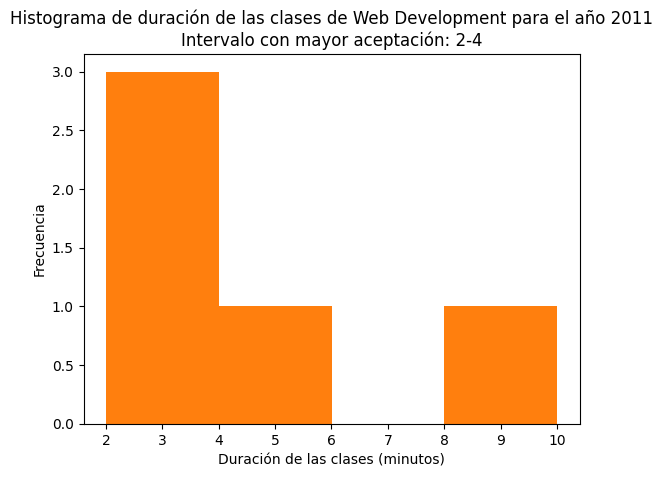

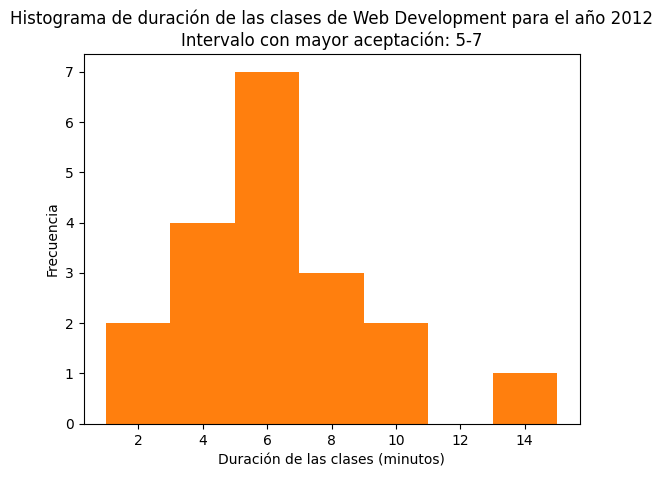

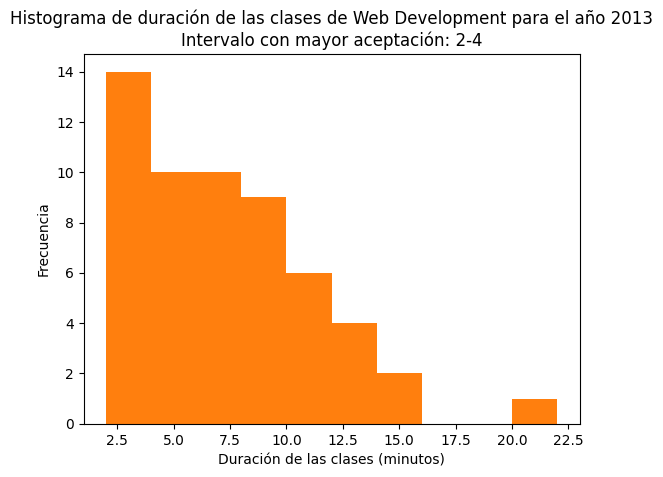

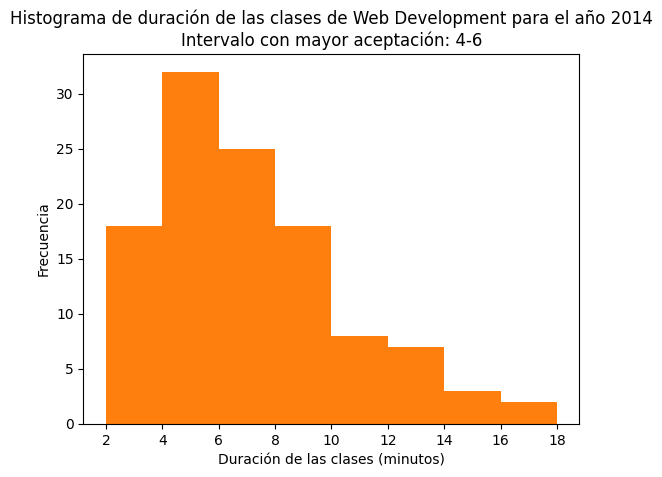

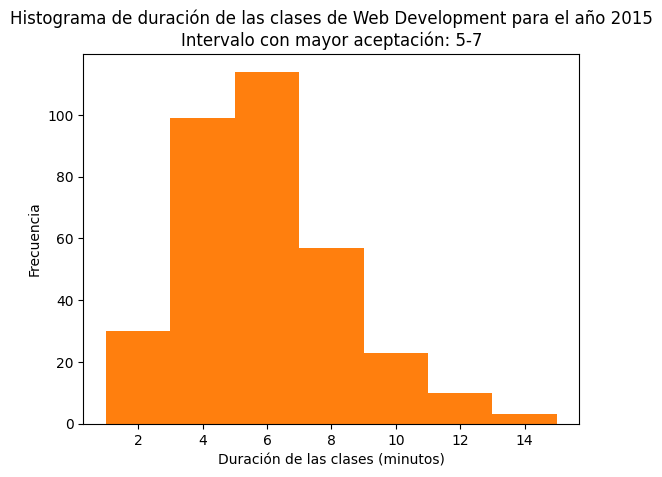

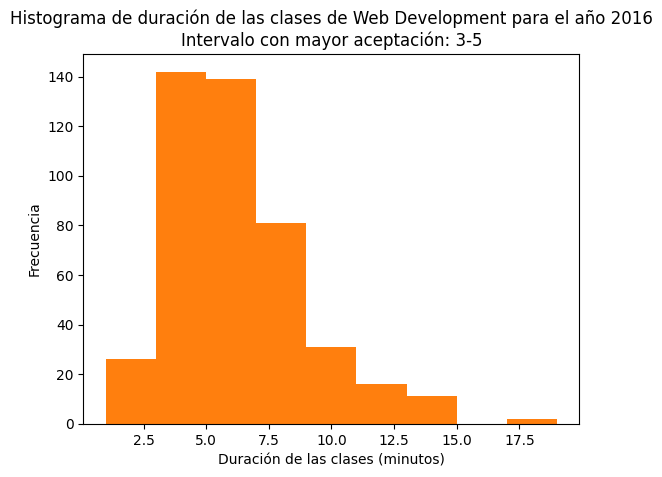

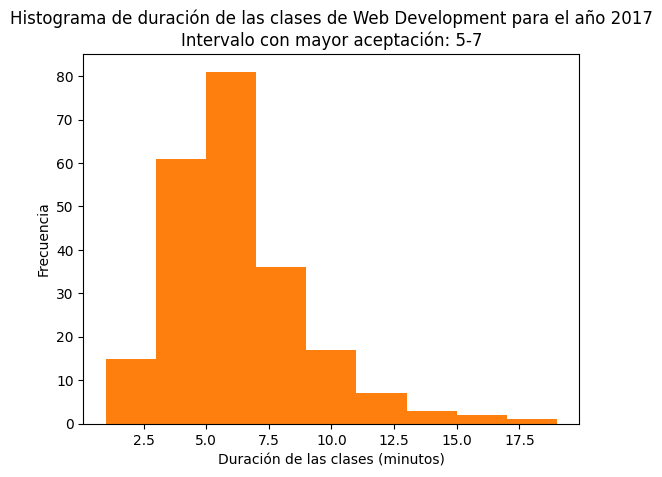

In [54]:
web_dev_courses = udemy_courses[udemy_courses['subject'] == 'Web Development']

# Obtener los años únicos y ordenarlos
unique_years = sorted(web_dev_courses['year'].unique())

# Crear un gráfico de histograma para cada año en orden ascendente
for year in unique_years:
    df_year = web_dev_courses[web_dev_courses['year'] == year]
    lectures_duration = df_year['lectures_duration_in_minutes']

    plt.hist(lectures_duration, bins=range(int(min(lectures_duration)), int(max(lectures_duration)) + 3, 2))
    plt.xlabel('Duración de las clases (minutos)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de duración de las clases de Web Development para el año {}'.format(year))

    # Encontrar el intervalo con mayor aceptación
    interval_counts, bin_edges, _ = plt.hist(lectures_duration, bins=range(int(min(lectures_duration)), int(max(lectures_duration)) + 3, 2))
    max_acceptance_interval = np.argmax(interval_counts)
    max_interval_start = bin_edges[max_acceptance_interval]
    max_interval_end = bin_edges[max_acceptance_interval + 1]

    plt.title('Histograma de duración de las clases de Web Development para el año {}\nIntervalo con mayor aceptación: {}-{}'.format(year, int(max_interval_start), int(max_interval_end)))

    plt.show()

      - Entre 3 - 7 minutos de duracion de las clases de Web Development es lo mas aceptado por la comunidad

- CONCLUSIONES DE LA COLUMNAS: 'content_duration', 'num_lectures', 'lectures_duration_in_minutes'
      - Entre 1 - 3 horas de duracion de cada curso es lo mas aceptado por la comunidad
      - Entre 1 - 3 horas, la duracion de los cursos de Web Development es lo mas aceptado por la comunidad
      - Entre 10 - 20 lecturas de cada curso es lo mas aceptado por la comunidad
      - Entre 15 - 25 lecturas de cada curso de Web development es lo mas aceptado por la comunidad
      - Entre 3 - 7 minutos de duracion de las clases es lo mas aceptado por la comunidad
      - Entre 3 - 7 minutos de duracion de las clases de Web Development es lo mas aceptado por la comunidad

      - Para la columna 'content_duration' vemos que las distribuciones de los datos estan sesgadas para la izquierda, lo que sugiere que la comunidad prefiere un curso relativamente mas corto [1 - 3 horas].
      - Para la columna 'num_lectures' vemos que las distribuciones de los datos esta sesgado hacia la izquierda, lo que sugiere que la comunidad opta por inscribirse a cursos con relativamente un numero pequeño de lecturas [10 - 25 lecturas].
      - Para la columna 'lectures_duration_in_minutes' vemos que las distribuciones de los datos estan ligeramente sesgados hacia la izquierda. La comunidad prefiere cursos con lecturas de corta duracion relativamente hablando [3 - 7 minutos].

      - En general, podemos concluir que la comunidad prefiere cursos de relativamente corta duracion (numero pequeño de lecturas y corta duracion de las mismas) y mejor si es en el area de Web Development.

- ¿El mes de lanzamiento de un curso importara?

In [55]:
# Agrupar y calcular los ingresos totales por año y mes
udemy_courses['month'] = pd.to_datetime(udemy_courses['published_timestamp']).dt.month
grouped = udemy_courses.groupby(['year', 'month']).sum()['revenue']

# Obtener los tres meses con mayores ingresos para cada año
top_months = grouped.groupby('year').nlargest(3).reset_index(level=0, drop=True)

# Almacenar los resultados en un diccionario
top_months_dict = top_months.groupby('year').apply(lambda x: x.index.get_level_values('month').map('{:02d}'.format).map(lambda m: pd.Timestamp.strftime(pd.Timestamp(1900, int(m), 1), format='%B'))).to_dict()

frecuencias_meses = {}

for year, months in top_months_dict.items():
    for month in months:
        if month in frecuencias_meses:
            frecuencias_meses[month] += 1
        else:
            frecuencias_meses[month] = 1

print(frecuencias_meses)

{'November': 2, 'December': 1, 'September': 3, 'June': 1, 'October': 4, 'April': 1, 'July': 1, 'August': 2, 'March': 3, 'February': 2, 'January': 1}


<ipython-input-55-a4ed846ffe9a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = udemy_courses.groupby(['year', 'month']).sum()['revenue']


      - Al parecer Octubre es un mes bueno para hacer dinero, quizas existan promociones y demas.

- En cada año, de los niveles de dificultad disponible, ¿Cual de ellos es el mejor o mas aceptado en cada año?

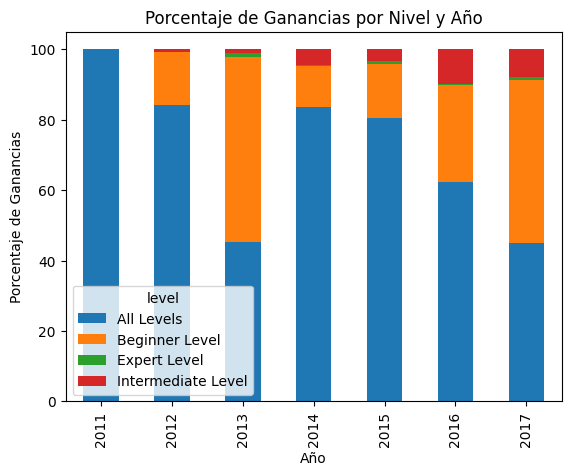

In [56]:
# Agrupar por año y nivel y sumar las ganancias
grouped_data = udemy_courses.groupby(['year', 'level'])['revenue'].sum()

# Calcular el total de ganancias por año
total_ganancias_year = udemy_courses.groupby('year')['revenue'].sum()

# Calcular el porcentaje de ganancias por nivel y año
porcentaje_ganancias = (grouped_data / total_ganancias_year) * 100

# Crear un gráfico de barras apiladas para cada nivel
fig, ax = plt.subplots()
porcentaje_ganancias.unstack().plot(kind='bar', stacked=True, ax=ax)

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje de Ganancias')
ax.set_title('Porcentaje de Ganancias por Nivel y Año')

# Mostrar el gráfico
plt.show()

In [57]:
# Calcular la cantidad de cursos por área de estudio y año
course_counts = udemy_courses.groupby(['year', 'subject']).size().reset_index(name='count')

# Calcular los porcentajes de cambio respecto al año anterior
course_counts['percentage_change'] = course_counts.groupby('subject')['count'].pct_change() * 100

# Imprimir los resultados
for i in range(1, len(course_counts)):
    current_year = course_counts.loc[i, 'year']
    previous_year = course_counts.loc[i-1, 'year']
    subject = course_counts.loc[i, 'subject']
    percentage_change = course_counts.loc[i, 'percentage_change']

    print(f"En el año {current_year}, el area de {subject} aumento en un {percentage_change:.2f}% respecto al año {previous_year}")

En el año 2012, el area de Business Finance aumento en un nan% respecto al año 2011
En el año 2012, el area de Graphic Design aumento en un nan% respecto al año 2012
En el año 2012, el area de Musical Instruments aumento en un nan% respecto al año 2012
En el año 2012, el area de Web Development aumento en un 280.00% respecto al año 2012
En el año 2013, el area de Business Finance aumento en un 1300.00% respecto al año 2012
En el año 2013, el area de Graphic Design aumento en un 130.00% respecto al año 2013
En el año 2013, el area de Musical Instruments aumento en un 290.00% respecto al año 2013
En el año 2013, el area de Web Development aumento en un 194.74% respecto al año 2013
En el año 2014, el area de Business Finance aumento en un 128.57% respecto al año 2013
En el año 2014, el area de Graphic Design aumento en un 186.96% respecto al año 2014
En el año 2014, el area de Musical Instruments aumento en un 207.69% respecto al año 2014
En el año 2014, el area de Web Development aumento

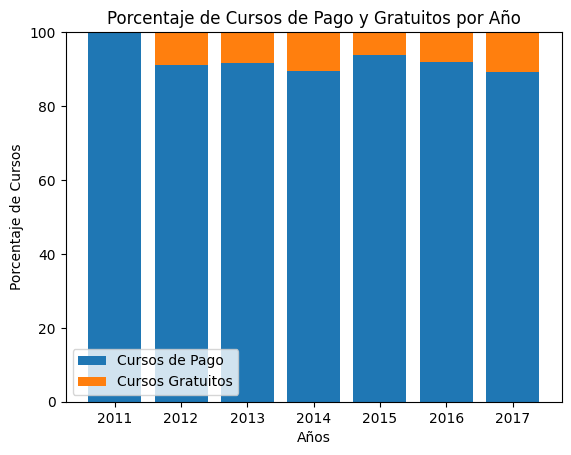

In [58]:
# Calcular el porcentaje de cursos de pago y cursos gratuitos para cada año
years = udemy_courses['year'].unique()
paid_percentages = []
free_percentages = []

for year in years:
    df_year = udemy_courses[udemy_courses['year'] == year]
    total_courses = len(df_year)
    paid_courses = len(df_year[df_year['is_paid'] == True])
    free_courses = len(df_year[df_year['is_paid'] == False])

    paid_percentage = (paid_courses / total_courses) * 100
    free_percentage = (free_courses / total_courses) * 100

    paid_percentages.append(paid_percentage)
    free_percentages.append(free_percentage)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots()

# Generar las barras apiladas
ax.bar(years, paid_percentages, label='Cursos de Pago')
ax.bar(years, free_percentages, bottom=paid_percentages, label='Cursos Gratuitos')

# Configurar etiquetas de ejes y título del gráfico
ax.set_xlabel('Años')
ax.set_ylabel('Porcentaje de Cursos')
ax.set_title('Porcentaje de Cursos de Pago y Gratuitos por Año')
ax.legend()

# Mostrar el gráfico
plt.show()

- Como vimos en el grafico de barras apiladas, en todos los años se ha mantenido masomenos en un 90% la cantidad de cursos que son de pago.

<ipython-input-59-2c57f3fc414d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df = udemy_courses.groupby('year').sum()
<ipython-input-59-2c57f3fc414d>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  paid_subscribers_per_year = paid_courses.groupby('year').sum()['num_subscribers']


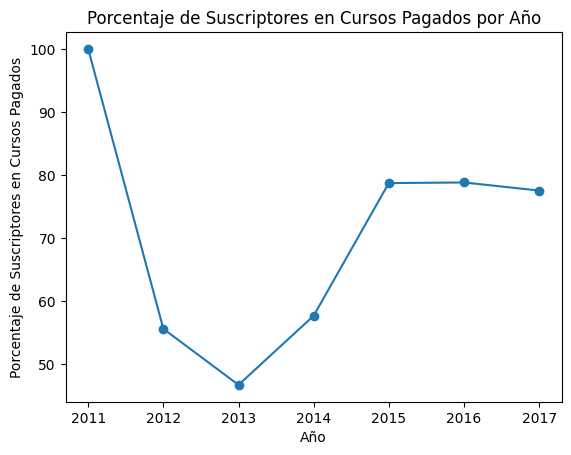

In [59]:
# Filtrar el dataset por años
filtered_df = udemy_courses.groupby('year').sum()

# Calcular el número total de suscriptores para cada año
total_subscribers_per_year = filtered_df['num_subscribers']

# Filtrar el dataset por cursos de pago
paid_courses = udemy_courses[udemy_courses['is_paid']]

# Calcular el número total de suscriptores a cursos de pago para cada año
paid_subscribers_per_year = paid_courses.groupby('year').sum()['num_subscribers']

# Calcular el porcentaje de suscriptores en cursos de pago por año
porcentaje_pagados = (paid_subscribers_per_year / total_subscribers_per_year) * 100

# Crear el gráfico de línea de tiempo
plt.plot(porcentaje_pagados.index, porcentaje_pagados, marker='o')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Suscriptores en Cursos Pagados')
plt.title('Porcentaje de Suscriptores en Cursos Pagados por Año')
plt.show()

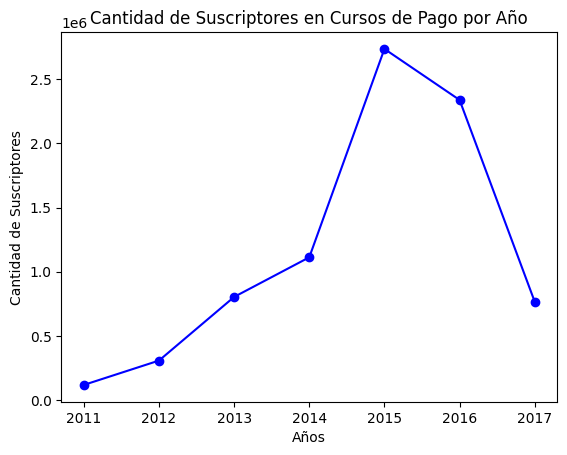

In [60]:
# Filtrar los cursos de pago
paid_courses = udemy_courses[udemy_courses['is_paid'] == True]

# Agrupar los datos por año y calcular la cantidad total de suscriptores en cursos de pago
subscribers_by_year = paid_courses.groupby('year')['num_subscribers'].sum()

# Crear el gráfico de líneas
fig, ax = plt.subplots()

# Generar el gráfico de líneas
ax.plot(subscribers_by_year.index, subscribers_by_year.values, marker='o', linestyle='-', color='blue')

# Configurar etiquetas de ejes y título del gráfico
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de Suscriptores')
ax.set_title('Cantidad de Suscriptores en Cursos de Pago por Año')

# Mostrar el gráfico
plt.show()

La cantidad de suscriptores en cursos de pago ha ido incrementando en numero, y como es comun el porcentaje respecto al total en cada año ha ido disminuyendo (hasta el año 2013). Desde el año 2013 hasta el año 2015 ha seguido incrementando la cantidad de suscriptores en cursos de pago y ocurre que que la estrategia ha funcionado y ha seguido aumentando el porcentaje de suscriptores de cursos de pago respecto del total en cada año. A partir del año 2015 ha ocurrido un descenso diriamos radical en el numero de suscriptores de cursos de pago, sin embargo, la proporcion como tal se ha mantenido.

In [61]:
udemy_courses.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year', 'revenue',
       'lectures_duration_in_minutes', 'month'],
      dtype='object')

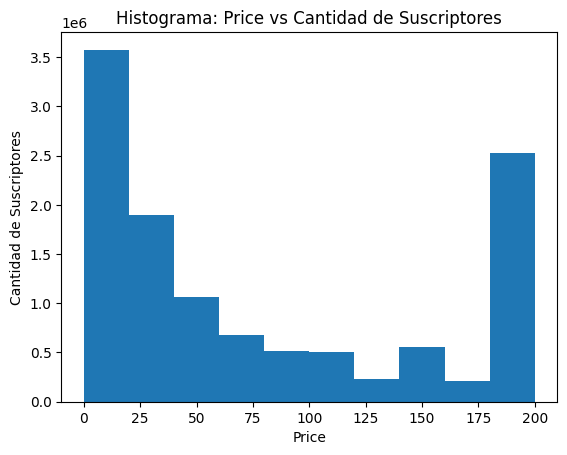

In [62]:
# Crear un histograma de 'price' vs 'num_subscribers'
plt.hist(udemy_courses['price'], weights=udemy_courses['num_subscribers'], bins=10)  # 'bins' determina el número de barras en el histograma
plt.xlabel('Price')
plt.ylabel('Cantidad de Suscriptores')
plt.title('Histograma: Price vs Cantidad de Suscriptores')
plt.show()

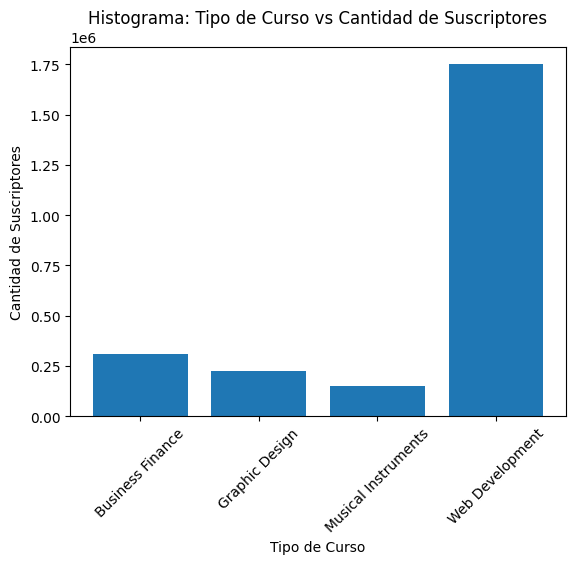

In [63]:
data = udemy_courses[udemy_courses['price']>180]
# Calcular el número de suscriptores por tipo de curso
course_counts = data.groupby('subject')['num_subscribers'].sum()
# Crear el histograma de tipo de curso vs cantidad de suscriptores
plt.bar(course_counts.index, course_counts.values)
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad de Suscriptores')
plt.title('Histograma: Tipo de Curso vs Cantidad de Suscriptores')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.show()

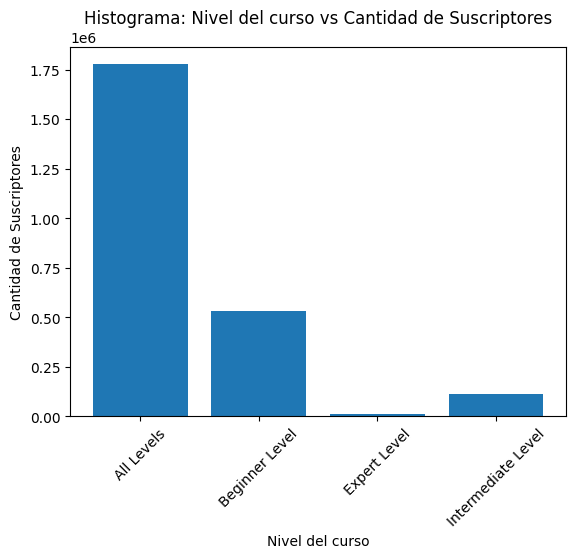

In [64]:
data = udemy_courses[udemy_courses['price']>180]
# Calcular el número de suscriptores por tipo de curso
course_counts = data.groupby('level')['num_subscribers'].sum()
# Crear el histograma de tipo de curso vs cantidad de suscriptores
plt.bar(course_counts.index, course_counts.values)
plt.xlabel('Nivel del curso')
plt.ylabel('Cantidad de Suscriptores')
plt.title('Histograma: Nivel del curso vs Cantidad de Suscriptores')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.show()

# **Conclusiones + KPIS**

- Al parecer los cursos de Web Development han sido los que mayor ingreso han generado. Sin embargo, vuelvo a mencionarlo, para triunfar muchas veces habra que tomar riesgos; la idea es que se tome el riesgo de lanzar cursos de areas que consideremos que tendran popularidad en los proximos años.
- Ademas desarrollar cursos de menor coste tambien resulta de cierta forma atractivo, pero como todo, a parte de ello tiene que ser de calidad pero bueno. En el mismo sentido, tambien observamos que la gente si esta dispuesta a pagar por cursos de mayor precio (por lo mostrado en el histograma parece ser que otra vez los cursos de Web Development han liderado ingresos), esto puede deberse a la importancia que le ven al curso, quizas por la institucion o por el curso en si (basicamente la comunidad los considera valiosos).
- La comunidad apoya a los cursos de menor duracion (menos lectures y menor duracion de las clases).

In [65]:
udemy_courses.to_csv('udemy_courses.csv', index=False, encoding='utf-8')